In [63]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# reading csv

In [65]:
customers = pd.read_csv("C:\\Users\\oabanderas\\Downloads\\Datos Necesarios\\Datos necesarios\\customers.csv")
customers.head(10)

,customer_id,type
0,383249,Hogar con Venta
1,249859,Estanquillos / kioscos
2,106498,Estanquillos / kioscos
3,385264,Abarrotes / Almacenes / Bodegas / Víveres
4,165442,Estanquillos / kioscos
5,275395,Estanquillos / kioscos
6,147449,Hogar con Venta
7,382939,Estanquillos / kioscos
8,345755,Hogar con Venta
9,175659,Farmacia Independiente


In [66]:
sales = pd.read_csv("C:\\Users\\oabanderas\\Downloads\\Datos Necesarios\\Datos necesarios\\sales.csv")
sales.head(10)

,customer_id,month,amount,churn_next_month
0,100000,202102,48.07,0.00
1,100000,202306,40.30,0.00
2,100000,202308,32.90,0.00
3,100000,202207,50.72,0.00
4,100000,202212,47.87,0.00
5,100000,202010,84.43,0.00
6,100000,202107,75.96,0.00
7,100000,202110,92.41,0.00
8,100000,202008,37.66,0.00
9,100000,202009,50.07,0.00


# checking sales

In [68]:
sales.shape

(5386175, 4)

In [69]:
sales.isna().sum()

customer_id             0
month                   0
amount                  0
churn_next_month    94272
dtype: int64

In [70]:
len(set(sales['customer_id']))

170367

In [71]:
sales.describe()

,customer_id,month,amount,churn_next_month
count,5386175.00,5386175.00,5386175.00,5291903.00
mean,250112.72,202139.33,215.23,0.01
std,86654.30,116.40,299.69,0.12
min,100000.00,201911.00,-343.77,0.00
25%,174945.50,202011.00,54.31,0.00
50%,250360.00,202110.00,130.96,0.00
75%,325280.00,202210.00,275.67,0.00
max,399999.00,202311.00,24286.95,1.00


In [72]:
len(sales[sales.amount < 0])

107

In [73]:
sales[sales.amount < 0].head()

,customer_id,month,amount,churn_next_month
44694,102503,202205,-0.09,1.00
99026,105528,202302,-0.72,0.00
119379,106607,202207,-0.00,1.00
148344,108253,202210,-0.00,1.00
204773,111343,202203,-0.00,0.00


In [74]:
sales['month'] = sales['month'].astype(str)

sales['date'] = sales['month']

sales['year'] = sales['month'].str[:4]
sales['month'] = sales['month'].str[4:]

sales['month'] = sales['month'].astype(int)
sales['year'] = sales['year'].astype(int)

sales.head()

,customer_id,month,amount,churn_next_month,date,year
0,100000,2,48.07,0.00,202102,2021
1,100000,6,40.30,0.00,202306,2023
2,100000,8,32.90,0.00,202308,2023
3,100000,7,50.72,0.00,202207,2022
4,100000,12,47.87,0.00,202212,2022


In [75]:
full_db = pd.merge(sales, customers, on='customer_id', how='left')
full_db.head()

,customer_id,month,amount,churn_next_month,date,year,type
0,100000,2,48.07,0.00,202102,2021,Estanquillos / kioscos
1,100000,6,40.30,0.00,202306,2023,Estanquillos / kioscos
2,100000,8,32.90,0.00,202308,2023,Estanquillos / kioscos
3,100000,7,50.72,0.00,202207,2022,Estanquillos / kioscos
4,100000,12,47.87,0.00,202212,2022,Estanquillos / kioscos


In [76]:
full_db['date'] = pd.to_datetime(full_db['date'], format='%Y%m')
full_db.head()

,customer_id,month,amount,churn_next_month,date,year,type
0,100000,2,48.07,0.00,2021-02-01,2021,Estanquillos / kioscos
1,100000,6,40.30,0.00,2023-06-01,2023,Estanquillos / kioscos
2,100000,8,32.90,0.00,2023-08-01,2023,Estanquillos / kioscos
3,100000,7,50.72,0.00,2022-07-01,2022,Estanquillos / kioscos
4,100000,12,47.87,0.00,2022-12-01,2022,Estanquillos / kioscos


# Stats

In [78]:
full_db = full_db[full_db.amount >= 0]

In [79]:
full_db.isna().sum()

customer_id             0
month                   0
amount                  0
churn_next_month    94269
date                    0
year                    0
type                  696
dtype: int64

In [80]:
full_db.describe()

,customer_id,month,amount,churn_next_month,date,year
count,5386068.00,5386068.00,5386068.00,5291799.00,5386068,5386068.00
mean,250112.60,6.58,215.23,0.01,2021-10-16 09:53:15.628721920,2021.33
min,100000.00,1.00,0.00,0.00,2019-11-01 00:00:00,2019.00
25%,174946.00,4.00,54.31,0.00,2020-11-01 00:00:00,2020.00
50%,250360.00,7.00,130.96,0.00,2021-10-01 00:00:00,2021.00
75%,325275.00,10.00,275.67,0.00,2022-10-01 00:00:00,2022.00
max,399999.00,12.00,24286.95,1.00,2023-11-01 00:00:00,2023.00
std,86654.23,3.48,299.69,0.12,NaN,1.17


In [81]:
df_avg = full_db.groupby('date', as_index=False)['amount'].mean()

C:\Users\oabanderas\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



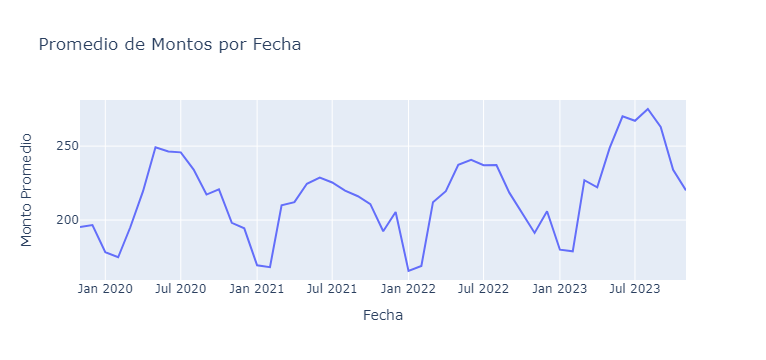

In [82]:
fig = px.line(df_avg, x='date', y='amount', title='Promedio de Montos por Fecha', labels={'date': 'Fecha', 'amount': 'Monto Promedio'})

# Mostrar la gráfica
fig.show()

In [83]:
df_avg2 = full_db.groupby(['date', 'type'], as_index=False)['amount'].mean()

C:\Users\oabanderas\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



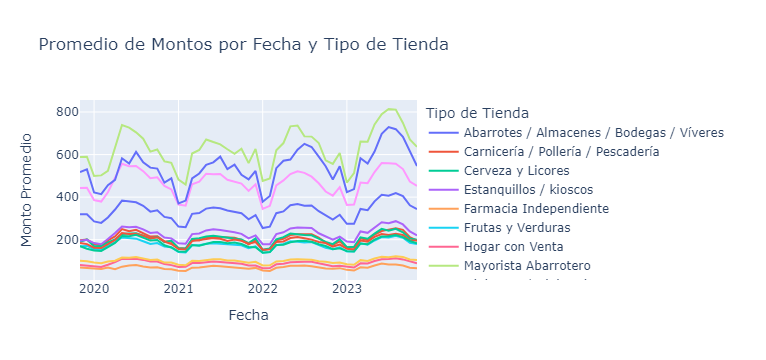

In [84]:
# Crear la gráfica de línea con el promedio de amount por fecha y tipo de tienda
fig = px.line(df_avg2, x='date', y='amount', color='type', title='Promedio de Montos por Fecha y Tipo de Tienda', labels={'date': 'Fecha', 'amount': 'Monto Promedio', 'type': 'Tipo de Tienda'})

# Mostrar la gráfica
fig.show()

In [85]:
min_dates = full_db.groupby('customer_id')['date'].min().reset_index()
min_dates.rename(columns={'date': 'min_date'}, inplace=True)

# Unir la fecha mínima de registro con el DataFrame original
full_db = full_db.merge(min_dates, on='customer_id')

# Calcular la antigüedad con respecto a la fecha mínima de registro
full_db['antiguedad'] = (full_db['date'] - full_db['min_date']).dt.days // 30

# Eliminar la columna 'min_date' si no es necesaria
full_db.drop(columns=['min_date'], inplace=True)

In [86]:

# Agregar componente estacional del cliente
full_db['componente_estacional'] = full_db.groupby(['customer_id', 'month'])['amount'].transform('mean')

# Clustering por cantidad de compra (KMeans con knee method)
X = full_db[['amount']].values
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)
knee = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = knee.knee
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)
full_db['cluster'] = kmeans.labels_

# Agregar varianza del cliente
full_db['varianza'] = full_db.groupby('customer_id')['amount'].transform('var')


# Mostrar el DataFrame final
full_db.head()

,customer_id,month,amount,churn_next_month,date,year,type,antiguedad,componente_estacional,cluster,varianza
0,100000,2,48.07,0.00,2021-02-01,2021,Estanquillos / kioscos,15,56.31,0,746.18
1,100000,6,40.30,0.00,2023-06-01,2023,Estanquillos / kioscos,43,72.83,0,746.18
2,100000,8,32.90,0.00,2023-08-01,2023,Estanquillos / kioscos,45,48.79,0,746.18
3,100000,7,50.72,0.00,2022-07-01,2022,Estanquillos / kioscos,32,55.39,0,746.18
4,100000,12,47.87,0.00,2022-12-01,2022,Estanquillos / kioscos,37,54.55,0,746.18


In [87]:
# Porcentaje contra promedio en temporada por tipo de tienda
full_db['promedio_temporada'] = full_db.groupby(['type', 'month'])['amount'].transform('mean')
full_db['porcentaje_vs_promedio'] = (full_db['amount'] / full_db['promedio_temporada'])


In [88]:
# Asegurarse de que los datos estén ordenados por 'customer_id' y 'date'
full_db = full_db.sort_values(by=['customer_id', 'date'])

# Inicializar la columna de tiempo desde la última compra
full_db['tiempo_desde_ultima_compra'] = 0

# Función para calcular el tiempo desde la última compra
def calcular_tiempo_desde_ultima_compra(amounts):
    tiempo_desde_ultima_compra = []
    contador = 0
    for amount in amounts:
        if amount > 0:
            contador = 0
        else:
            contador += 1
        tiempo_desde_ultima_compra.append(contador)
    return tiempo_desde_ultima_compra

# Aplicar la función para cada cliente
full_db['tiempo_desde_ultima_compra'] = full_db.groupby('customer_id')['amount'].transform(calcular_tiempo_desde_ultima_compra)

In [89]:
def calculate_percentage_change(df):
    # Asegura que el DataFrame esté ordenado por cliente y mes
    df = df.sort_values(by=['customer_id', 'year', 'month'])
    
    # Calcula el cambio porcentual en la columna 'amount'
    df['percentage_change'] = df.groupby('customer_id')['amount'].pct_change() * 100
    
    # Rellena los valores NaN con 0 para los primeros registros de cada cliente donde no hay un mes anterior para comparar
    df['percentage_change'] = df['percentage_change'].fillna(0)
    
    return df

full_db = calculate_percentage_change(full_db)

In [90]:
full_db["cluster"].unique()

array([0, 3, 1, 2])

In [91]:
filtered_db = full_db[full_db['customer_id'] == 100020]

# Ordenar el DataFrame filtrado por la columna 'date' en orden ascendente
sorted_filtered_db = filtered_db.sort_values(by='date')

sorted_filtered_db.head()

,customer_id,month,amount,churn_next_month,date,year,type,antiguedad,componente_estacional,cluster,varianza,promedio_temporada,porcentaje_vs_promedio,tiempo_desde_ultima_compra,percentage_change
433,100020,11,17.70,0.00,2019-11-01,2019,Hogar con Venta,0,10.67,0,85.55,81.59,0.22,0,0.00
409,100020,12,8.81,0.00,2019-12-01,2019,Hogar con Venta,1,6.38,0,85.55,78.39,0.11,0,-50.25
419,100020,1,11.27,0.00,2020-01-01,2020,Hogar con Venta,2,6.45,0,85.55,70.80,0.16,0,28.00
426,100020,2,7.04,0.00,2020-02-01,2020,Hogar con Venta,3,5.55,0,85.55,70.09,0.10,0,-37.50
405,100020,3,5.64,0.00,2020-03-01,2020,Hogar con Venta,4,13.05,0,85.55,86.38,0.07,0,-20.00


In [92]:
filtered_db = full_db[full_db['customer_id'] == 383249]

# Ordenar el DataFrame filtrado por la columna 'date' en orden ascendente
sorted_filtered_db = filtered_db.sort_values(by='date')

sorted_filtered_db.head()

,customer_id,month,amount,churn_next_month,date,year,type,antiguedad,componente_estacional,cluster,varianza,promedio_temporada,porcentaje_vs_promedio,tiempo_desde_ultima_compra,percentage_change
5085239,383249,11,224.30,0.00,2019-11-01,2019,Hogar con Venta,0,167.90,0,4470.98,81.59,2.75,0,0.00
5085215,383249,12,251.13,0.00,2019-12-01,2019,Hogar con Venta,1,191.48,0,4470.98,78.39,3.20,0,11.96
5085225,383249,1,264.49,0.00,2020-01-01,2020,Hogar con Venta,2,161.98,3,4470.98,70.80,3.74,0,5.32
5085232,383249,2,229.02,0.00,2020-02-01,2020,Hogar con Venta,3,167.68,0,4470.98,70.09,3.27,0,-13.41
5085211,383249,3,248.79,0.00,2020-03-01,2020,Hogar con Venta,4,198.66,0,4470.98,86.38,2.88,0,8.63


In [93]:

full_db[full_db["amount"] == 0].head()

,customer_id,month,amount,churn_next_month,date,year,type,antiguedad,componente_estacional,cluster,varianza,promedio_temporada,porcentaje_vs_promedio,tiempo_desde_ultima_compra,percentage_change
435,100020,4,0.00,0.00,2020-04-01,2020,Hogar con Venta,5,6.02,0,85.55,90.03,0.00,1,-100.00
427,100020,5,0.00,0.00,2020-05-01,2020,Hogar con Venta,6,18.92,0,85.55,99.55,0.00,2,0.00
429,100020,6,0.00,0.00,2020-06-01,2020,Hogar con Venta,7,10.76,0,85.55,102.78,0.00,3,0.00
400,100020,9,0.00,0.00,2020-09-01,2020,Hogar con Venta,10,9.25,0,85.55,95.62,0.00,1,-100.00
396,100020,10,0.00,0.00,2020-10-01,2020,Hogar con Venta,11,17.04,0,85.55,90.65,0.00,2,0.00


In [125]:
full_db.to_parquet('full_db_clean.parquet')